In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend. plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
import mlxtend                                                          
print(mlxtend.__version__)  

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPool1D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

0.17.3


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df1 = pd.read_csv('/content/drive/My Drive/N.csv')
df2 = pd.read_csv('/content/drive/My Drive/F.csv')
df2 = df2.sample(4000)
data = df1.append(df2,ignore_index= True)

In [5]:
data.shape

(15978, 48)

In [6]:
data.isnull().sum()

X1_ActualPosition            0
X1_ActualVelocity            0
X1_ActualAcceleration        0
X1_CommandPosition           0
X1_CommandVelocity           0
X1_CommandAcceleration       0
X1_CurrentFeedback           0
X1_DCBusVoltage              0
X1_OutputCurrent             0
X1_OutputVoltage             0
X1_OutputPower               0
Y1_ActualPosition            0
Y1_ActualVelocity            0
Y1_ActualAcceleration        0
Y1_CommandPosition           0
Y1_CommandVelocity           0
Y1_CommandAcceleration       0
Y1_CurrentFeedback           0
Y1_DCBusVoltage              0
Y1_OutputCurrent             0
Y1_OutputVoltage             0
Y1_OutputPower               0
Z1_ActualPosition            0
Z1_ActualVelocity            0
Z1_ActualAcceleration        0
Z1_CommandPosition           0
Z1_CommandVelocity           0
Z1_CommandAcceleration       0
Z1_CurrentFeedback           0
Z1_DCBusVoltage              0
Z1_OutputCurrent             0
Z1_OutputVoltage             0
S1_Actua

In [7]:
data['class'].value_counts()

0    11978
1     4000
Name: class, dtype: int64

In [8]:
normal = data[data['class']==0]
faulty = data[data['class']==1]
normal.shape, faulty.shape

((11978, 48), (4000, 48))

In [9]:
X = data.drop('class', axis = 1)
y = data['class']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0, stratify =y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11983, 47), (3995, 47), (11983,), (3995,))

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [11]:
X_train.shape

(11983, 47)

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_train.shape, X_test.shape

((11983, 47, 1), (3995, 47, 1))

**Model**

In [13]:
model = Sequential()
model.add(Conv1D(16,2,activation='relu', input_shape = X_train[0].shape))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Conv1D(128,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 46, 16)            48        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 23, 16)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 16)            64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 22, 128)           4224      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 128)           512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 128)           0

In [15]:
model.compile(optimizer=Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 10ms/step - loss: 0.5607 - accuracy: 0.7657 - val_loss: 0.4887 - val_accuracy: 0.7845
Epoch 2/20
375/375 [==============================] - 4s 9ms/step - loss: 0.4666 - accuracy: 0.7959 - val_loss: 0.4415 - val_accuracy: 0.8073
Epoch 3/20
375/375 [==============================] - 4s 9ms/step - loss: 0.4316 - accuracy: 0.8071 - val_loss: 0.4228 - val_accuracy: 0.8155
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.4117 - accuracy: 0.8191 - val_loss: 0.4077 - val_accuracy: 0.8233
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3887 - accuracy: 0.8277 - val_loss: 0.3837 - val_accuracy: 0.8373
Epoch 6/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3745 - accuracy: 0.8329 - val_loss: 0.3804 - val_accuracy: 0.8343
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3563 - accuracy: 0.8438 - val_loss: 0.3701 - val_accuracy: 0.8423
Ep

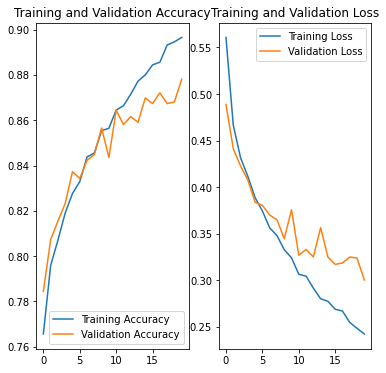

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

# epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
loss, acc = model.evaluate(X_test,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))


125/125 - 0s - loss: 0.3004 - accuracy: 0.8781
Restored model, accuracy: 87.81%


In [19]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8780976220275344

In [20]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

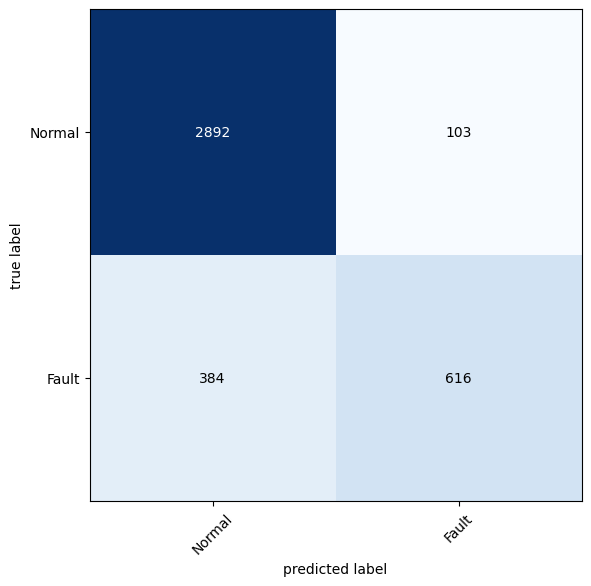

In [21]:
class_names = ['Normal','Fault']
mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6,6), class_names = class_names, show_normed = False)
plt.tight_layout()
plt.show()
fig.savefig('cm.png')

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2995
           1       0.86      0.62      0.72      1000

    accuracy                           0.88      3995
   macro avg       0.87      0.79      0.82      3995
weighted avg       0.88      0.88      0.87      3995



In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

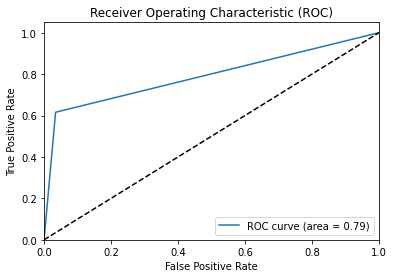

In [24]:
plot_roc(y_pred,y_test)

In [25]:
fig.savefig('ROC.png')